## Esame Metodi Numerici  4 Luglio 2024 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 

dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 7]**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 2]**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

In [1]:
from scipy.io import loadmat
import numpy as np
from SolveTriangular import Lsolve, Usolve
import matplotlib.pyplot as plt

dati = loadmat('testI')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

In [2]:
# punto 1
# Controllo le caratteristiche della matrice

def diagonale_dominante(A):
    absA = np.abs(A)
    return np.all(2*np.diag(absA)>np.sum(absA, axis=1)) # |Aii| > sum_j!=i|Aij| => 2|Aii| > sum_j|Aij|

print("Matrice A:", A)
print("- dimensione:", A.shape) # 400x400, quadrata e grande
print("- densità:", np.count_nonzero(A)/np.prod(A.shape)) # 0.117 < 0.33, sparsa
print("- diagonale strettamente dominante:", diagonale_dominante(A)) # a diagonale strettamente dominante
print("- simmetrica:", np.all(A.T==A)) # non simmetrica
print("- definita positiva:", np.all(np.linalg.eigvals(A)>0)) # definita positiva

# in base alle caratteristiche della matrice, possiamo utilizzare come metodi di risoluzione
# - Jacobi
# - Gauss-Seidel
# - Gauss-Seidel SOR

# scelgo di implementare Jacobi e Gauss-Seidel

def jacobi(A,b,x0,toll,it_max):
    errore=toll+1
    n=A.shape[0]
    
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A, -1)
    F=np.triu(A, 1) 
    M=D
    N=-(E+F) 
    invM=np.linalg.inv(M)
    T=invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=T@x0 + invM@b 
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d) 
    E=np.tril(A, -1) 
    F=np.triu(A, 1) 
    M=D+E 
    N=-F
    invM=np.linalg.inv(M)
    T=invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it <= it_max and errore >= toll: 
        x, flag=Lsolve(M, b+N@x0)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

x0=np.zeros_like(b) # iterato iniziale [0, 0, 0, ..., 0]^T
toll=1e-10
itmax=1000

x_j, it_j, err_j = jacobi(A, b, x0, toll, itmax)
x_gs, it_gs, err_gs = gauss_seidel(A, b, x0, toll, itmax)

Matrice A: [[ 2.13394913e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.36871792e-04  2.46802556e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.63244072e+00 ...  0.00000000e+00
   0.00000000e+00  3.51129090e-01]
 ...
 [ 0.00000000e+00 -2.78565889e-05  0.00000000e+00 ...  1.80062301e+00
   2.78057572e-03  2.22284436e-05]
 [ 1.19842701e-03  0.00000000e+00  0.00000000e+00 ...  1.03954037e-01
   1.53242384e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  8.89515779e-01]]
- dimensione: (400, 400)
- densità: 0.116775
- diagonale strettamente dominante: True
- simmetrica: False
- definita positiva: True
raggio spettrale jacobi 0.4820926155362992
raggio spettrale Gauss-Seidel  0.28897377801648944


Soluzione Jacobi (32 iterazioni): [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.

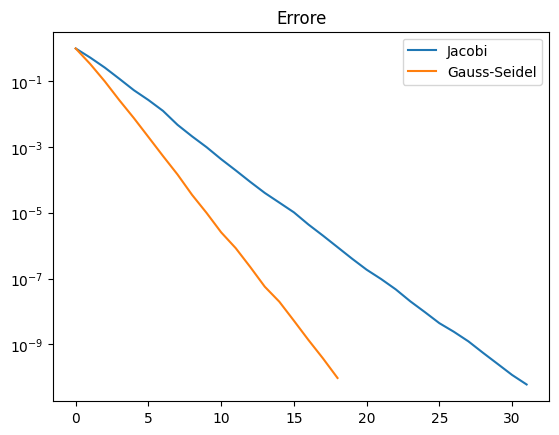

In [3]:
# punto 2
# Soluzioni trasposte per comodità di stampa
print(f"Soluzione Jacobi ({it_j} iterazioni): {x_j.T}")
print(f"Soluzione Gauss-Seidel ({it_gs} iterazioni): {x_gs.T}")

plt.title("Errore")
plt.yscale("log")
plt.plot(range(it_j), err_j, label="Jacobi")
plt.plot(range(it_gs), err_gs, label="Gauss-Seidel")
plt.legend()
plt.show()

# Gauss-Seidel converge alla soluzione più velocemente rispetto a Jacobi in quanto presenta un 
# raggio spettrale inferiore (0.289 < 0.482)

- Data la matrice
$$
\left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
4.0 & 6.0 & 3.0 & 2.0\\
2.0 & 1.0 & 4.0 & 3.0\\
1.0 & 4.0 & 2.0 & 7.0
\end{array}
\right ],
$$
calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu e:
- sfruttarla per il calcolo del suo determinante (confrontare l'esattezza del calcolo con quello ottenuto usando la funzione numpy.linalg.det)             **[punti: 2]**
- sfruttarla per il calcolo della sua inversa risolvendo n sistemi lineari (confrontare l'inversa con quella ottenuta usando la funzione numpy.linalg.inv)
                                                                                                    **[punti: 2]**

In [4]:
import numpy as np
import scipy as sp

In [5]:
A = np.array([
    [3.0, 2.0, 1.0, -1.0],
    [4.0, 6.0, 3.0, 2.0],
    [2.0, 1.0, 4.0, 3.0],
    [1.0, 4.0, 2.0, 7.0],
])

PT, L, U = sp.linalg.lu(A)
P = PT.T.copy()
print("Fattorizzazione LU di Gauss:")
print("- P:", P)
print("- L:", L)
print("- U:", U)

Fattorizzazione LU di Gauss:
- P: [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
- L: [[ 1.    0.    0.    0.  ]
 [ 0.75  1.    0.    0.  ]
 [ 0.5   0.8   1.    0.  ]
 [ 0.25 -1.    0.    1.  ]]
- U: [[ 4.    6.    3.    2.  ]
 [ 0.   -2.5  -1.25 -2.5 ]
 [ 0.    0.    3.5   4.  ]
 [ 0.    0.    0.    4.  ]]


In [6]:
# punto 1
detA = np.prod(np.diag(U))*np.linalg.det(P) # il determinante di L non viene incluso in quanto sempre 1
print("Determinante (fattorizzazione):", detA)
print("Determinante (numpy):", np.linalg.det(A))

Determinante (fattorizzazione): 140.0
Determinante (numpy): 140.00000000000006


In [7]:
# punto 2
# Per ottenere l'inversa della matrice, dobbiamo risolvere n sistemi lineari utilizzando la i-esima colonna della 
# matrice identità come termini noti (b)

n = A.shape[0]
B = np.eye(n)
# riutilizzo la fattorizzazione di A per la risoluzione di tutti i sistemi
X = np.zeros_like(B)
for i in range(n):
    b = B[:,i].reshape((n,1))
    pb = P@b
    x, flag = Lsolve(L, pb)
    x, flag = Usolve(U, x)
    X[:,i] = x.reshape((1,n))

print("Inversa (fattorizzazione):", X)
print("Inversa (numpy):", np.linalg.inv(A))

Inversa (fattorizzazione): [[ 0.85       -0.45        0.          0.25      ]
 [-0.39285714  0.39285714 -0.14285714 -0.10714286]
 [-0.51428571  0.31428571  0.28571429 -0.28571429]
 [ 0.25       -0.25        0.          0.25      ]]
Inversa (numpy): [[ 0.85       -0.45        0.          0.25      ]
 [-0.39285714  0.39285714 -0.14285714 -0.10714286]
 [-0.51428571  0.31428571  0.28571429 -0.28571429]
 [ 0.25       -0.25        0.          0.25      ]]


## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
                           [**punti: 7**]

- Risolvere il sistema di equazioni non lineare 

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

 **Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

- Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili.

 [**punti: 2**]
 



In [8]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [20]:
# punto 1

def newton_raphson(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it < max_iterations and erroreF > tolF and erroreX > tolX:
        jx = J_Numerical(X[0], X[1])
        
        if np.linalg.det(jx) == 0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
        
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(s,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

def newton_raphson_corde(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it < max_iterations and erroreF > tolF and erroreX > tolX:
        if it == 0:
            jx = J_Numerical(X[0], X[1])
        
            if np.linalg.det(jx) == 0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(s,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore


def newton_raphson_sham(initial_guess, update, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it < max_iterations and erroreF > tolF and erroreX > tolX:
        if it%update == 0:
            jx = J_Numerical(X[0], X[1])
        
            if np.linalg.det(jx) == 0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(s,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

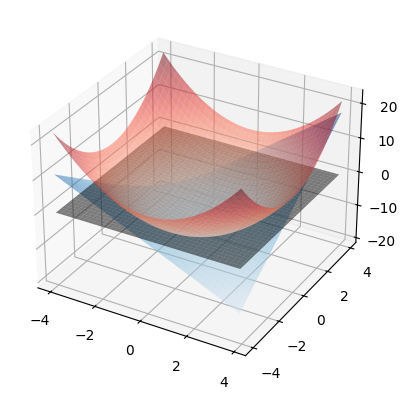

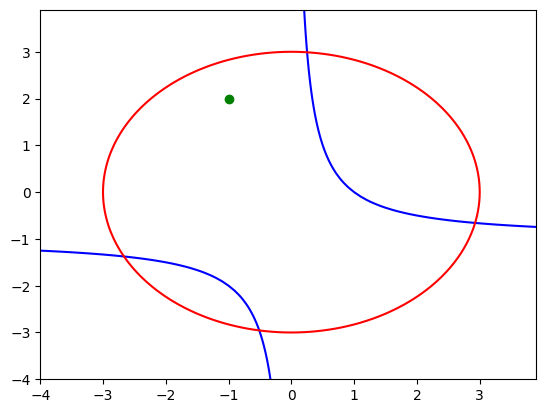

Soluzione (Newton-Raphson, 6 iterazioni): [0.25065734 2.98951014]
Soluzione (Newton-Raphson Corde, 1000 iterazioni): [-0.4685764   2.03427523]
Soluzione (Newton-Raphson Shamaskii, 13 iterazioni): [0.25065734 2.98951014]


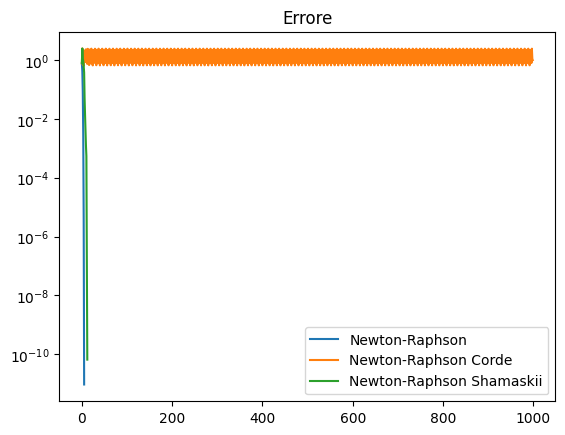

In [36]:
# punto 2

x0s, x1s = sym.symbols("x0s x1s")

f1s = x0s*x1s+x0s-1
f2s = x0s**2 +x1s**2 -9

Fs=sym.Matrix([[f1s], [f2s]])   

# Calcolo della matrice Jacobiana simbolicamente
Js = Fs.jacobian(sym.Matrix([x0s, x1s]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J = sym.lambdify([x0s, x1s], Js, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F = sym.lambdify([x0s, x1s], Fs, np)

#Disegnare superfici e curve di livello per determinare la stima dell'iterato iniziale
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F(X,Y).squeeze()
 
# Plotta la superficie  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='Blues',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.show()

#Plot superifici di controllo
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='blue')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')

# Un buon iterato iniziale potrebbe essere il punto (-1, 2), per cercare di arrivare alla soluzione in circa (0.25, 3)
initial_guess = np.array([-1, 2])
plt.plot([initial_guess[0]], [initial_guess[1]], 'go')
plt.show()

tolX = tolF = 1e-10
max_iterations = 1000
update = 5 # ogni quante iterazioni aggiornare lo Jacobiano per la variante di Shamaskii
X_nr, it_nr, err_nr = newton_raphson(initial_guess, F, J, tolX, tolF, max_iterations)
X_nrc, it_nrc, err_nrc = newton_raphson_corde(initial_guess, F, J, tolX, tolF, max_iterations)
X_nrs, it_nrs, err_nrs = newton_raphson_sham(initial_guess, update, F, J, tolX, tolF, max_iterations)

print(f"Soluzione (Newton-Raphson, {it_nr} iterazioni):", X_nr)
print(f"Soluzione (Newton-Raphson Corde, {it_nrc} iterazioni):", X_nrc)
print(f"Soluzione (Newton-Raphson Shamaskii, {it_nrs} iterazioni):", X_nrs)

plt.title("Errore")
plt.yscale("log")
plt.plot(range(it_nr), err_nr, label="Newton-Raphson")
plt.plot(range(it_nrc), err_nrc, label="Newton-Raphson Corde")
plt.plot(range(it_nrs), err_nrs, label="Newton-Raphson Shamaskii")
plt.legend()
plt.show()

# Più è alta la frequenza con cui si ricalcola lo Jacobiano, più velocemente si converge alla soluzione, 
# ma più è alto il costo computazionale.
# Si può notare infatti come Newton-Raphson, che ricalcola lo Jacobiano ogni iterazione, è quello che converge in meno iterazioni,
# la variante di Shamaskii, che ricalcola lo Jacobiano ogni m iterazioni, converge più lentamente e infine la variante delle corde,
# che calcola lo Jacobiano solo inizialmente, non riesce nemmeno a convergere

**Punto 3**: La variante di Newton-Raphson per per calcolare il minimo di una funzione non lineare a più variabili sfrutta la matrice Hessiana della funzione al posto dello Jacobiano e il gradiente della funzione come sistema da risolvere. Questo perchè, trovando il punto in cui il gradiente si annulla, si trova un punto di cambio di direzione della funzione. Tramite la matrice Hessiana si può poi distinguere se questo si tratta di un minimo, massimo o punto di sella.

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?

x	Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche

•	Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing

•	Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione


**2.** Per una rete neurale, l’apprendimento è legato a:

x	Minimizzare la funzione obiettivo

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il Test di Turing serve a:

x	Valutare se una macchina dimostra un comportamento intelligente

•	Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale

•	Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale

•	Valutare se una macchina dimostra un comportamento predicibile


**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:

x	CNN, GAN e Transformers

•	Expert Systems, CNN e GAN

•	Expert Systems, Deep Learning e CNN

x	CNN, Expert Systems e Transformers # sbagliata


**5.** A cosa serve il validation set?

x	A trovare i migliori iperparametri del modello

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**

**1:** Nella formula di aggiornamento dei pesi mediante gradient descent il learning rate rappresenta la grandezza del passo (step-size) che si compie ogni volta cercando di minizzare la funzione loss. L'aggiornamento del learning rate programmato consiste nel variare il valore del learning rate durante l'allenamento, invece che tenerlo costante. Esistono diversi metodi di aggiornamento:
- step decay: lo step-size viene decrementato secondo un valore costante ogni iterazione
- decadimento esponenziale: lo step-size viene aggiornato secondo una decrescita esponenziale
- decadimento dipendente dal tempo: lo step-size viene aggiornato in funzione del numero di iterazioni svolte

**2:** Il learning rate adattivo consiste nell'adattare questo valore in maniera diversa per i vari pesi: infatti pesi diversi potrebbero richiedere tempi di allenamento diversi a seconda di quanto variano ad ogni iterazione, di conseguenza utilizzare lo stesso step-size per ogni peso porterebbe ad un overfitting dei pesi con variazione frequente e una mancanza di allenamento necessario per pesi modificati meno frequentemente. Esistono quindi diversi metodi per il calcolo del learning rate adattivo per ogni peso:
- Adagrad: Adatta il learning rate secondo il quadrato del gradiente della cost function. Questo può portare ad un decadimento dello step-size troppo veloce arrivando ad avere variazioni minime quasi subito.
- RMSProp: Simile ad Adagrad, per ridurre la velocità di decadimento utilizza una media esponenziale dei gradienti invece che i quadrati.
- Adadelta: Regola lo step size in base ad un metodo di aggiornamento del learning rate programmato, come può essere step decay, decadimento esponenziale, decadimento dipendente dal tempo
- Adam: Adatta il learning rate secondo un "momentum", ovvero in base ai gradienti precedenti aumentando o diminuendo il valore di questa velocità per favorire la discesa quando i gradienti tendono ad andare verso la stessa direzione nel corso del tempo